<a href="https://colab.research.google.com/github/Biang23/GoogleColab/blob/main/ResNet_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


In [78]:
# Define model
from torchvision.models.resnet import BasicBlock as block

class ResNetBasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride):
    super(ResNetBasicBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(out_channels)

    self.shortcut = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
        nn.BatchNorm2d(out_channels)
    )

  def forward(self, x):
    residual = self.shortcut(x)
    out = self.conv1(x)
    out = self.bn1(out)
    out = F.relu(out)
    out = self.conv2(out)
    out = self.bn2(out)
    return F.relu(out + residual)


class ResNet18(torch.nn.Module):
  def __init__(self):
    super(ResNet18, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
    self.bn1 = nn.BatchNorm2d(64)
    self.block1 = nn.Sequential(
        ResNetBasicBlock(64, 64, 1),
        ResNetBasicBlock(64, 64, 1)
    )
    self.block2 = nn.Sequential(
        ResNetBasicBlock(64, 128, 2),
        ResNetBasicBlock(128, 128, 2)
    )
    self.block3 = nn.Sequential(
        ResNetBasicBlock(128, 256, 2),
        ResNetBasicBlock(256, 256, 2)
    )
    self.block4 = nn.Sequential(
        ResNetBasicBlock(256, 512, 2),
        ResNetBasicBlock(512, 512, 2)
    )
    # self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.fc = nn.Linear(512, 10)

  def forward(self, x):
    out = self.conv1(x)
    out = self.block1(out)
    out = self.block2(out)
    out = self.block3(out)
    out = self.block4(out)
    # out = self.avgpool(out)
    out = out.reshape(x.shape[0], -1)

    out = self.fc(out)
    return out

model = ResNet18()

In [82]:
import torch
import torch.nn as nn
from torch.nn import functional as F


class ResNetBasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResNetBasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        output = self.conv1(x)
        output = F.relu(self.bn1(output))
        output = self.conv2(output)
        output = self.bn2(output)
        return F.relu(x + output)


class ResNetDownBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResNetDownBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride[0], padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride[1], padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.extra = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride[0], padding=0),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        extra_x = self.extra(x)
        output = self.conv1(x)
        out = F.relu(self.bn1(output))

        out = self.conv2(out)
        out = self.bn2(out)
        return F.relu(extra_x + out)


class ResNet18_(nn.Module):
    def __init__(self):
        super(ResNet18_, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = nn.Sequential(RestNetBasicBlock(64, 64, 1),
                                    RestNetBasicBlock(64, 64, 1))

        self.layer2 = nn.Sequential(RestNetDownBlock(64, 128, [2, 1]),
                                    RestNetBasicBlock(128, 128, 1))

        self.layer3 = nn.Sequential(RestNetDownBlock(128, 256, [2, 1]),
                                    RestNetBasicBlock(256, 256, 1))

        self.layer4 = nn.Sequential(RestNetDownBlock(256, 512, [2, 1]),
                                    RestNetBasicBlock(512, 512, 1))

        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.reshape(x.shape[0], -1)
        out = self.fc(out)
        return out
model1 = ResNet18_()

In [4]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [61]:
def accuracy(output, target):
    # get the index of the max log-probability
    pred = output.max(1, keepdim=True)[1]
    return pred.eq(target.view_as(pred)).float().mean()

In [6]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

batch_size = 128

def get_vis_loader():

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
    return trainloader, testloader

def get_train_loader(batch_size, transform):
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    return trainloader

def get_test_loader(batch_size, transform):
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return testloader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

vistrainloader, vistestloader = get_vis_loader()
trainloader = get_train_loader(batch_size, transform)
testloader = get_test_loader(batch_size, transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 34102962.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


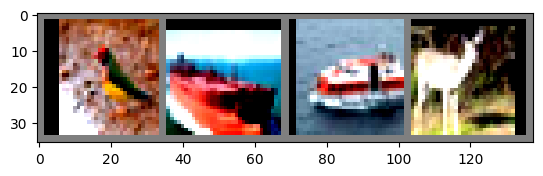

 bird  ship  ship  deer


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(vistrainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def accuracy(output, target):
    # get the index of the max log-probability
    pred = output.max(1, keepdim=True)[1]
    return pred.eq(target.view_as(pred)).float().mean()

In [41]:
def forward_step(net, inputs, labels):
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    return outputs, loss, labels


def train(net, loader, optimizer, max_epoch):
    net.to(device)
    net.train()
    N = len(loader)
    print_interval = (N // 8 // 100 + 1) * 100
    for epoch in range(max_epoch):  # loop over the dataset multiple times

        running_loss = 0.0
        running_acc = 0.0
        for i, data in enumerate(loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            images, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs, loss, labels = forward_step(net, images, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            running_acc += accuracy(outputs, labels).item()
            if (i + 1) % print_interval == 0:
                print('Epoch: [%d / %d], batches: [%d / %d], loss: %.3f, acc: %.2f' %
                      (epoch + 1, max_epoch, i + 1, N,
                       running_loss / print_interval, 100 * running_acc / print_interval))
                running_loss = 0.0
                running_acc = 0.0

    print('Finished Training')

In [79]:
train(model, trainloader, optimizer, 5)

Epoch: [1 / 5], batches: [100 / 391], loss: 2.421, acc: 10.55
Epoch: [1 / 5], batches: [200 / 391], loss: 2.415, acc: 10.65
Epoch: [1 / 5], batches: [300 / 391], loss: 2.426, acc: 10.07
Epoch: [2 / 5], batches: [100 / 391], loss: 2.424, acc: 10.02
Epoch: [2 / 5], batches: [200 / 391], loss: 2.431, acc: 10.02
Epoch: [2 / 5], batches: [300 / 391], loss: 2.416, acc: 10.00
Epoch: [3 / 5], batches: [100 / 391], loss: 2.426, acc: 10.23
Epoch: [3 / 5], batches: [200 / 391], loss: 2.427, acc: 10.68
Epoch: [3 / 5], batches: [300 / 391], loss: 2.426, acc: 10.24
Epoch: [4 / 5], batches: [100 / 391], loss: 2.420, acc: 10.14
Epoch: [4 / 5], batches: [200 / 391], loss: 2.423, acc: 9.88
Epoch: [4 / 5], batches: [300 / 391], loss: 2.426, acc: 10.02
Epoch: [5 / 5], batches: [100 / 391], loss: 2.420, acc: 10.28
Epoch: [5 / 5], batches: [200 / 391], loss: 2.432, acc: 10.06
Epoch: [5 / 5], batches: [300 / 391], loss: 2.427, acc: 10.03
Finished Training
